     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3

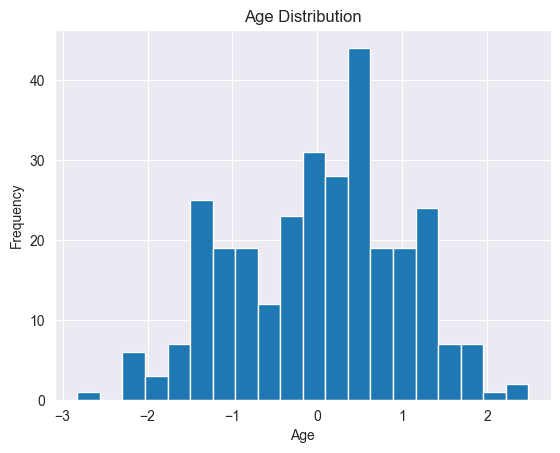

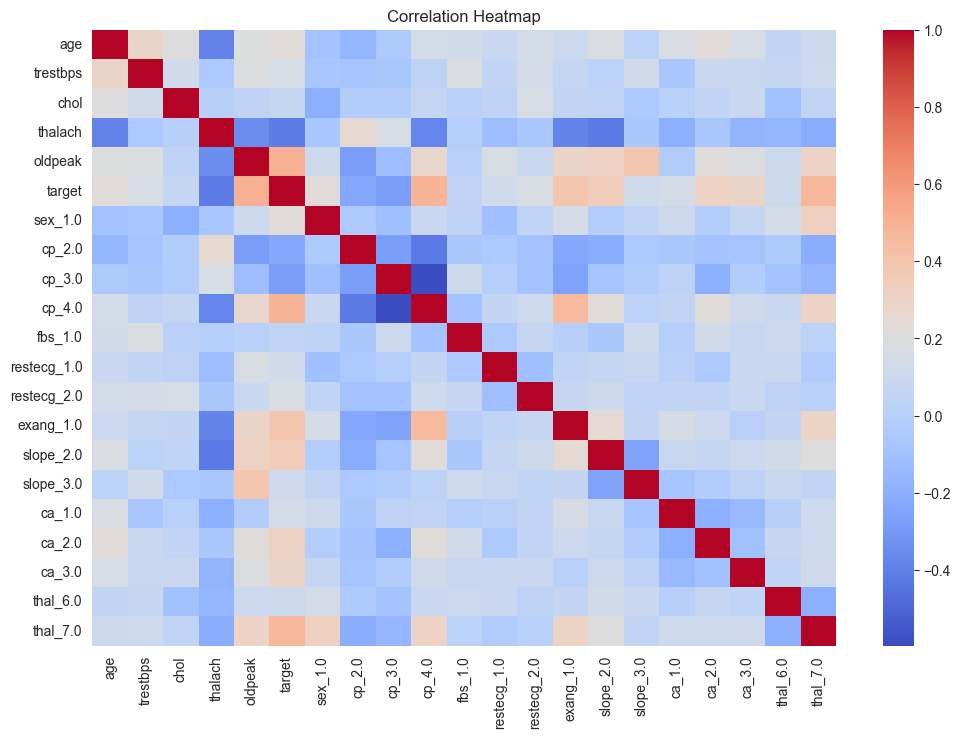

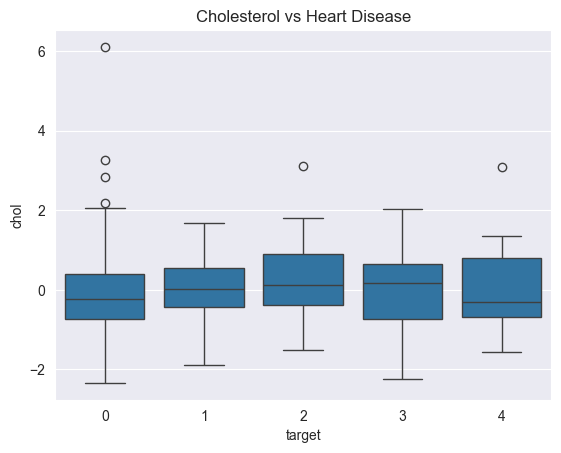

        age  trestbps      chol   thalach   oldpeak  target  sex_1.0  cp_2.0  \
0  0.936181  0.750380 -0.276443  0.017494  1.068965       0     True   False   
1  1.378929  1.596266  0.744555 -1.816334  0.381773       2     True   False   
2  1.378929 -0.659431 -0.353500 -0.899420  1.326662       1     True   False   
3 -1.941680 -0.095506  0.051047  1.633010  2.099753       0     True   False   
4 -1.498933 -0.095506 -0.835103  0.978071  0.295874       0    False    True   

   cp_3.0  cp_4.0  ...  restecg_1.0  restecg_2.0  exang_1.0  slope_2.0  \
0   False   False  ...        False         True      False      False   
1   False    True  ...        False         True       True       True   
2   False    True  ...        False         True       True       True   
3    True   False  ...        False        False      False      False   
4   False   False  ...        False         True      False      False   

   slope_3.0  ca_1.0  ca_2.0  ca_3.0  thal_6.0  thal_7.0  
0       True   

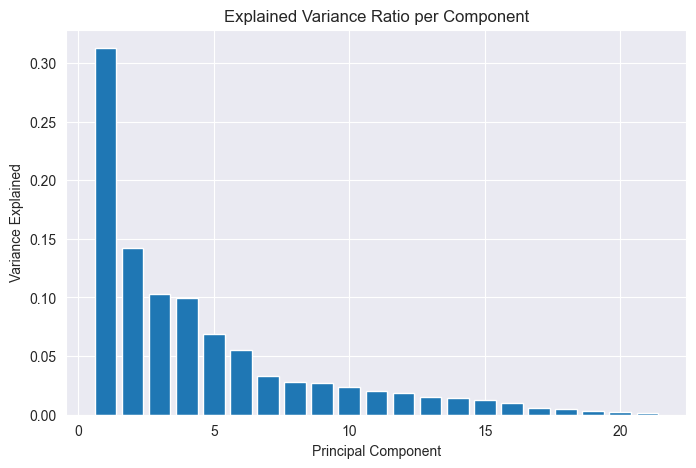

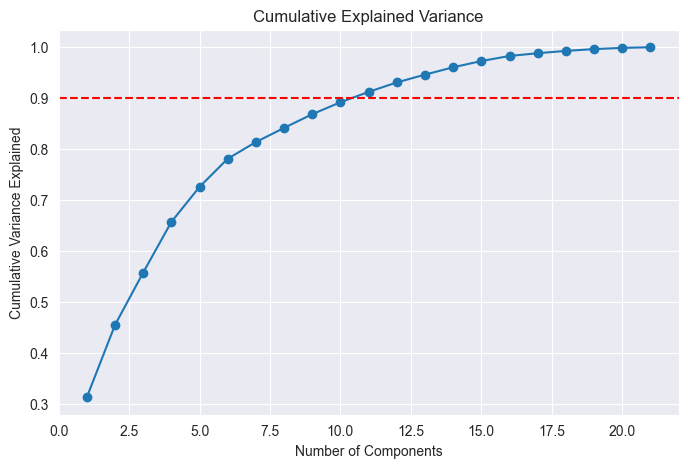

In [1]:
%run 02_pca_analysis.ipynb

In [2]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Train a quick Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)  # uses scaled features

# Extract importance scores
importances = rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(importance_df.head(10))  # top 10 features


     Feature  Importance
7    thalach    0.138926
9    oldpeak    0.117851
0        age    0.115244
4       chol    0.113633
3   trestbps    0.099319
11        ca    0.094761
12      thal    0.082430
2         cp    0.075682
8      exang    0.046423
10     slope    0.042554


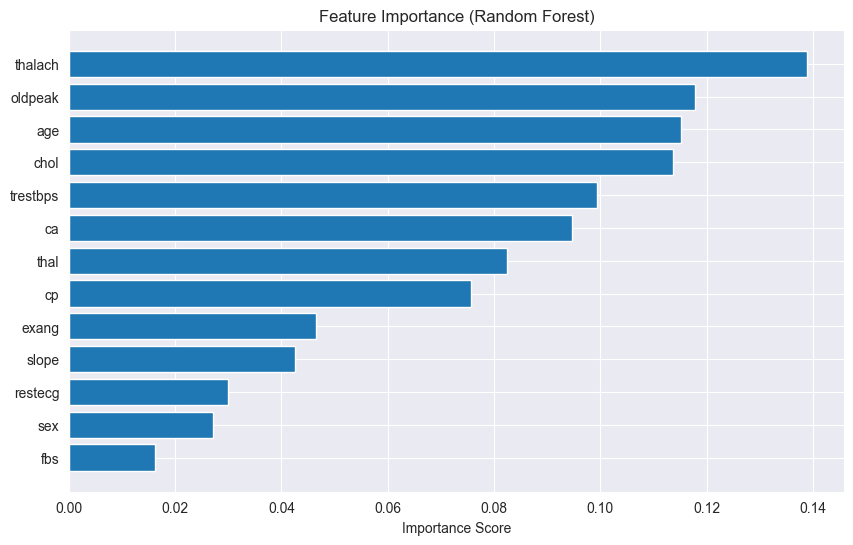

In [3]:
plt.figure(figsize=(10,6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.show()


In [4]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

# Keep top 10 features
rfe = RFE(log_reg, n_features_to_select=10)
rfe.fit(X_scaled, y)

selected_features = X.columns[rfe.support_]
print("Selected Features via RFE:", selected_features.tolist())


Selected Features via RFE: ['age', 'sex', 'cp', 'fbs', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']


In [5]:
print(X.dtypes)


age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
dtype: object


In [6]:
X["ca"] = X["ca"].astype(float)
X["thal"] = X["thal"].astype(float)


In [7]:
print(X.dtypes)


age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
dtype: object


In [8]:
from sklearn.feature_selection import chi2, SelectKBest

# Apply Chi-Square to select top 10 features
chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X.abs(), y)   # absolute values (chi2 requires non-negative)

chi2_features = X.columns[chi2_selector.get_support()]
print("Selected Features via Chi-Square:", chi2_features.tolist())


Selected Features via Chi-Square: ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']


In [9]:
# Union of features from RFE and Chi-Square
final_features = list(set(selected_features) | set(chi2_features))
X_reduced = X[final_features]

print("Final Selected Features:", final_features)
print("Reduced dataset shape:", X_reduced.shape)


Final Selected Features: ['chol', 'ca', 'sex', 'thal', 'trestbps', 'restecg', 'thalach', 'exang', 'cp', 'fbs', 'slope', 'age', 'oldpeak']
Reduced dataset shape: (297, 13)
